,Feature1,Feature2,Target
0,-1.402878,-0.173382,0
1,-2.245828,-1.120642,0
2,-1.914231,-0.572390,0
3,-0.566826,1.595493,0
4,-1.339679,0.863684,0
...,...,...,...
995,1.575013,0.083836,1
996,-1.737725,-0.476969,0
997,-1.128308,0.297531,0
998,-0.488876,2.267812,0


Target
0    900
1    100
Name: count, dtype: int64
Class distribution before sampling: Counter({0: 900, 1: 100})


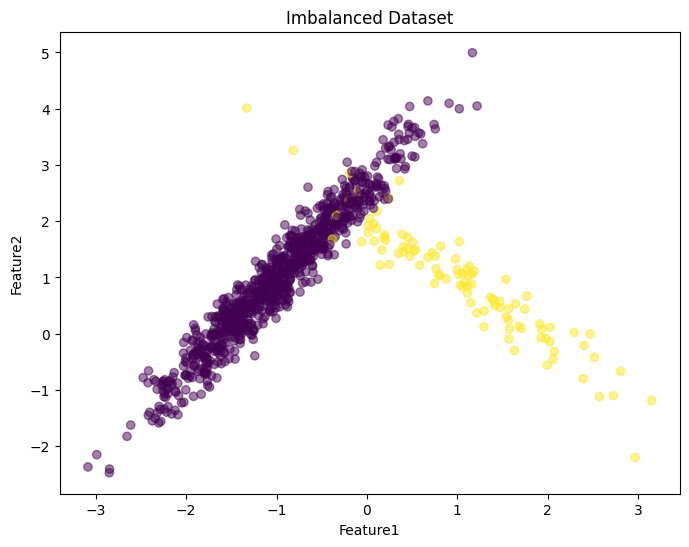

Class distribution after sampling: Counter({0: 900, 1: 900})


,Feature1,Feature2,Target
0,-1.402878,-0.173382,0
1,-2.245828,-1.120642,0
2,-1.914231,-0.572390,0
3,-0.566826,1.595493,0
4,-1.339679,0.863684,0
...,...,...,...
1795,0.583383,1.215695,1
1796,0.106764,1.871766,1
1797,2.074144,-0.318285,1
1798,0.676119,1.354979,1


Target
0    900
1    900
Name: count, dtype: int64


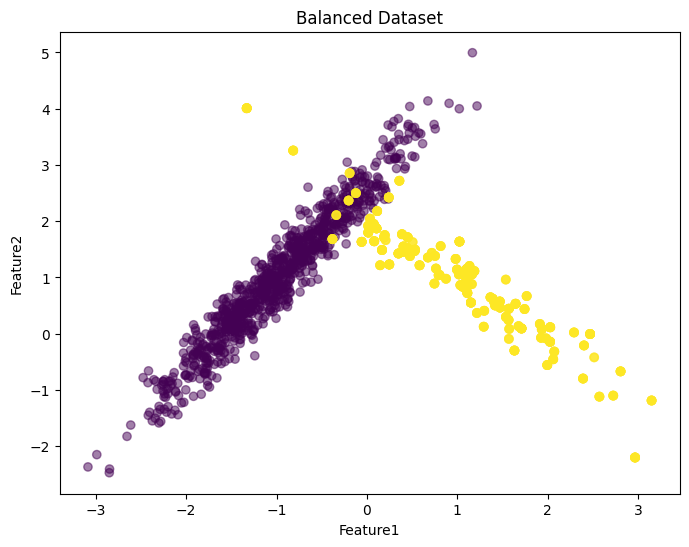

In [6]:
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

# Create an example imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.9, 0.1], flip_y=0, random_state=42)

# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Target'] = y

display(df)
print(df['Target'].value_counts())

# Display the class distribution before sampling
print("Class distribution before sampling:", Counter(y))

# Plot the imbalanced dataset
plt.figure(figsize=(8, 6))
plt.scatter(df['Feature1'], df['Feature2'], c=df['Target'], cmap='viridis', alpha=0.5)
plt.title('Imbalanced Dataset')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()

# Apply RandomOverSampler to balance the dataset
oversample = RandomOverSampler()
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Display the class distribution after sampling
print("Class distribution after sampling:", Counter(y_resampled))

# Convert resampled data to DataFrame for better visualization
df_resampled = pd.DataFrame(X_resampled, columns=['Feature1', 'Feature2'])
df_resampled['Target'] = y_resampled

display(df_resampled)
print(df_resampled['Target'].value_counts())

# Plot the balanced dataset
plt.figure(figsize=(8, 6))
plt.scatter(df_resampled['Feature1'], df_resampled['Feature2'], c=df_resampled['Target'], cmap='viridis', alpha=0.5)
plt.title('Balanced Dataset')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.show()